In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, auc, roc_curve

In [132]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [130]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [30]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [31]:
for n in data.index:
    if data.loc[n, 'TotalCharges'] == ' ':
        data.loc[n, 'TotalCharges'] = 'NaN'

In [32]:
data['TotalCharges'] = data['TotalCharges'].astype(float).fillna(0.0)

In [33]:
data.loc[:, ['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

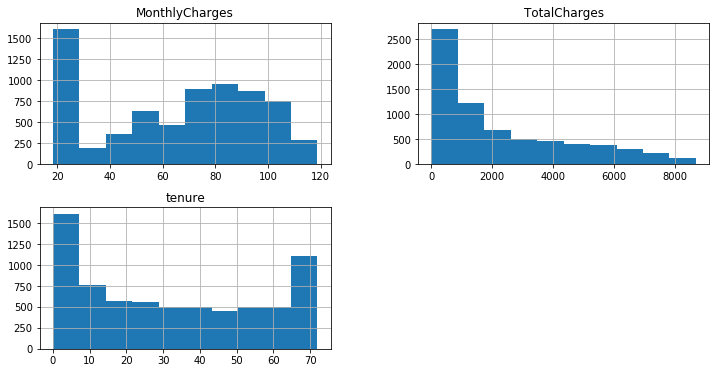

In [35]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(figsize=(12, 6));

In [72]:
data_num = data.loc[:, ['SeniorCitizen', 'tenure', 'MonthlyCharges', 
                        'TotalCharges']]
data_cat = data.drop(['customerID', 'SeniorCitizen', 'tenure', 
                      'MonthlyCharges', 'TotalCharges', 'Churn'], axis=1)
target = np.where(data['Churn'] == 'Yes', 1, 0)

In [73]:
data_cat_dum = pd.get_dummies(data_cat)

data_clean = pd.concat([data_num, data_cat_dum], axis=1)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
SeniorCitizen                              7043 non-null int64
tenure                                     7043 non-null int64
MonthlyCharges                             7043 non-null float64
TotalCharges                               7043 non-null float64
gender_Female                              7043 non-null uint8
gender_Male                                7043 non-null uint8
Partner_No                                 7043 non-null uint8
Partner_Yes                                7043 non-null uint8
Dependents_No                              7043 non-null uint8
Dependents_Yes                             7043 non-null uint8
PhoneService_No                            7043 non-null uint8
PhoneService_Yes                           7043 non-null uint8
MultipleLines_No                           7043 non-null uint8
MultipleLines_No phone service             7043 non-null uint8
Multipl

In [74]:
X_train, X_test, y_train, y_test = train_test_split(data_clean, target,
                                                    test_size=700,
                                                    random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=700,
                                                  random_state=2)

In [75]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
pred = model.predict(X_val)
acc = accuracy_score(y_val, pred)
print(acc)

0.78


In [76]:
model.predict_proba(X_train)

array([[1.  , 0.  ],
       [0.94, 0.06],
       [0.98, 0.02],
       ...,
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [77]:
def plot_feature_importances(model, x):
    '''Display barplot representing a model's feature importances.
    
    Note that in a Jupyter Notebook, running this function will display
    the plot automatically.
    
    Keyword arguments:
    model: a trained classifier with .feature_importances_ attribute
    x: the training dataset or other object of identical dimensions
    
    Dependencies:
    matplotlib.pyplot aliased as plt
    '''
    n_features = x.shape[1]
    plt.figure(figsize=(8,10))
    plt.barh(x.columns, model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), x.columns) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature (Component)")
    plt.title('Feature Importances')

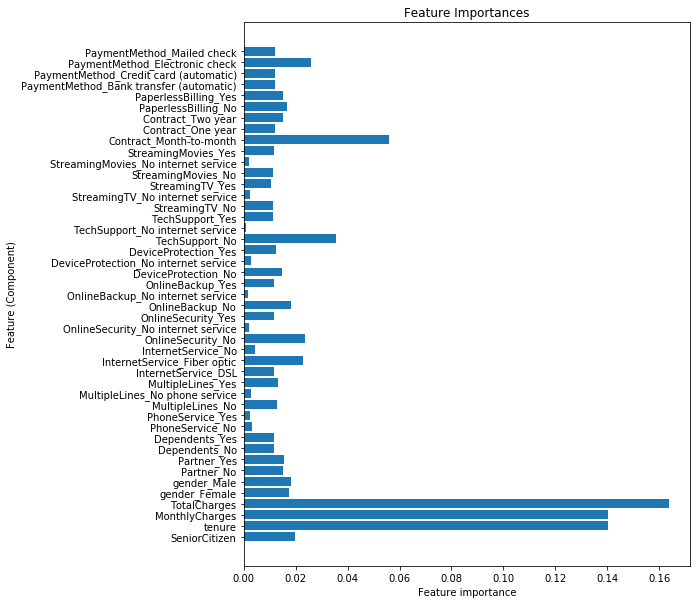

In [78]:
plot_feature_importances(model, data_clean)

In [79]:
params = {'n_estimators': [10, 50, 100],
          'max_features': [5, 10, 45],
          'max_depth': [5, 10, 20]}
model = RandomForestClassifier()
grid = GridSearchCV(model, params, cv=3)

grid.fit(X_train, y_train)

print('Best params:', grid.best_params_)
print('Best score:', grid.best_score_)

Best params: {'max_depth': 5, 'max_features': 45, 'n_estimators': 100}
Best score: 0.8020556441609074


In [81]:
params = {'n_estimators': [100, 150, 200],
          'max_features': [30, 40, 45],
          'max_depth': [4, 5, 6]}
model = RandomForestClassifier()
grid = GridSearchCV(model, params, cv=3)

grid.fit(X_train, y_train)

print('Best params:', grid.best_params_)
print('Best score:', grid.best_score_)

Best params: {'max_depth': 6, 'max_features': 30, 'n_estimators': 100}
Best score: 0.8055998582314372


In [83]:
params = {'n_estimators': [90, 100, 110],
          'max_features': [25, 30, 35],
          'max_depth': [6, 7, 8]}
model = RandomForestClassifier()
grid = GridSearchCV(model, params, cv=3)

grid.fit(X_train, y_train)

print('Best params:', grid.best_params_)
print('Best score:', grid.best_score_)

Best params: {'max_depth': 6, 'max_features': 25, 'n_estimators': 100}
Best score: 0.8043593833067517


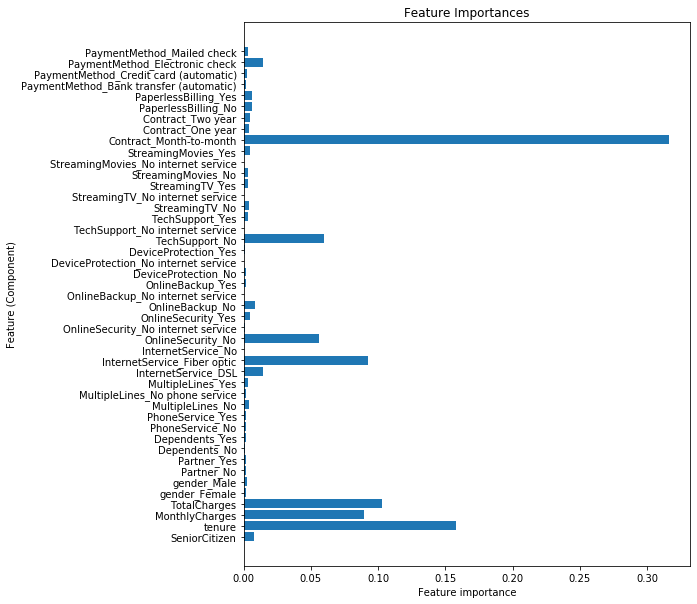

In [87]:
model = RandomForestClassifier(n_estimators=100, max_depth=6, max_features=30)
model.fit(X_train, y_train)
plot_feature_importances(model, X_train)

In [88]:
feats = list(zip(X_train.columns, model.feature_importances_))
feats_sort = sorted(feats, key=lambda x: x[1], reverse=True)
top_feats = feats_sort[:5]
top_feats

[('Contract_Month-to-month', 0.31623446403397004),
 ('tenure', 0.15792126399214237),
 ('TotalCharges', 0.10292121533343358),
 ('InternetService_Fiber optic', 0.09213115368570748),
 ('MonthlyCharges', 0.08963083112743765)]

In [93]:
tenure_churn = pd.concat([data['tenure'], pd.Series(target, name='Churn')], axis=1)
tenure_churn.corr()

tenure     Churn
tenure  1.000000 -0.352229
Churn  -0.352229  1.000000

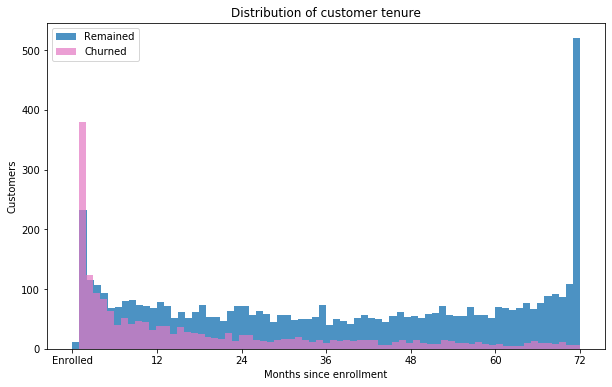

In [129]:
tenure_stay = tenure_churn[tenure_churn['Churn'] == 0]
tenure_go = tenure_churn[tenure_churn['Churn'] == 1]

plt.figure(figsize=(10,6))
plt.hist(tenure_stay['tenure'], color='tab:blue', alpha=0.8, bins=72,
         label='Remained')
plt.hist(tenure_go['tenure'], color='tab:pink', alpha=0.7, bins=72, 
         label='Churned')
plt.legend()
plt.title('Distribution of customer tenure')
plt.xticks(np.arange(0, 73, 12), ['Enrolled', '12', '24', '36', '48', '60', 
                                  '72'])
plt.xlabel('Months since enrollment')
plt.ylabel('Customers')
plt.show();

In [134]:
pd.Series(y_train).value_counts()

0    4149
1    1494
dtype: int64

In [135]:
log = LogisticRegression(class_weight='balanced')
log.fit(X_train, y_train)
pred = log.predict(X_val)
accuracy_score(y_val, pred)

/Users/jennykreiger/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7728571428571429